In [29]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
from nltk.probability import FreqDist
import seaborn as sns

from documents import Document, Corpus, Sentence
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Instantiate a corpus object which reads in all .txt files in a directory
path_to_writing_folder = "/Users/mbarry/Documents/03_hobbies/writing/prose/essays"
corpus = Corpus(path_to_writing_folder)

There are 51 documents in the corpus
There are 26008 words in the corpus


In [4]:
print(f"There are {corpus.document_count} documents in the corpus")

There are 51 documents in the corpus


# Tokenizing the corpus and counting words

In [10]:
corpus.tokenize_corpus()

all_words = FreqDist(corpus.document_tokens)
all_words.most_common(10)

[('i', 2303),
 ('to', 933),
 ('the', 776),
 ('a', 623),
 ('that', 538),
 ('of', 464),
 ('my', 452),
 ('was', 422),
 ('it', 402),
 ('and', 390)]

In [11]:
# View most common words without stop words
corpus.tokenize_corpus(remove_stop_words=True)
all_words = FreqDist(corpus.document_tokens)
all_words.most_common(10)

[('feel', 179),
 ('like', 155),
 ('would', 136),
 ('able', 111),
 ('good', 102),
 ('really', 94),
 ('life', 87),
 ('way', 82),
 ('think', 82),
 ('father', 77)]

In [14]:
document_lengths = [len(doc) for doc in corpus.documents.values()]


(array([36.,  7.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([    0. ,  2586.9,  5173.8,  7760.7, 10347.6, 12934.5, 15521.4,
        18108.3, 20695.2, 23282.1, 25869. ]),
 <BarContainer object of 10 artists>)

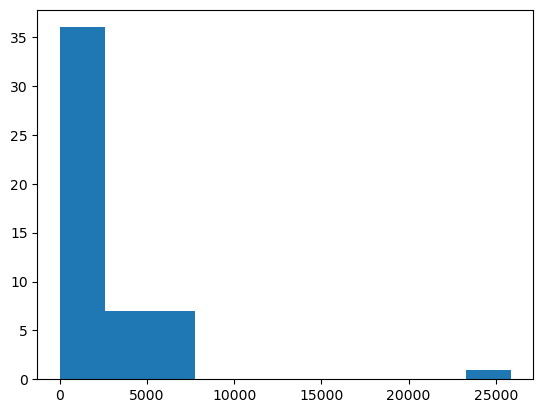

In [15]:
fig, ax = plt.subplots()
ax.hist(document_lengths)

# Sentences 

In [53]:
example_sentence = "This is an example sentence, with a comma."

sentence = Sentence(example_sentence)

In [54]:
# The sentence class creates a list of tokens
sentence.word_tokens

['This', 'is', 'an', 'example', 'sentence', 'with', 'a', 'comma']

In [57]:
# All punctuation are stored in the punctuation mark list
sentence.punctuation_marks

[',', '.']

In [58]:
# Type of sentence is determined by the last punctuation mark
sentence.type_of_sentence

'declarative'

# Document Class

In [73]:
path_to_journal = "../writing/sample_journal.txt"
document = Document(path_to_journal)

The document class reads in the document in it's entirety and stores it in the document_string attribute.

In [76]:
document.document_string

'# March 5th, 2023  I am excited about the Sentence class I coded today.  It seems like it could be a useful tool to help writers explore granular aspects of their writing. It is fun making choices about what parts of a sentence are important, and what attributes a Sentence class should have.  I am a bit worried that I am overengineering this project.  Even if it is, it is good practice in organization.  It is interesting to think about natural language components as Python objects.'

On instantiation, the document object creates sentence objects which allow for easy exploration of the word attributes.

In [77]:
document.sentences[0].sentence_string

'# March 5th, 2023  I am excited about the Sentence class I coded today.'

# Document Length 